# Anchor pass-QC snATAC-seq object to scRNA-seq (ALL cells, no GFP+ filtering)
- https://satijalab.org/seurat/articles/seurat5_atacseq_integration_vignette

## Set up correct conda environment

In [1]:
.libPaths()

[1] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [2]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [3]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



Attaching shinyBS

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following ob

In [4]:
sample <- 'V'

In [5]:
# value is either 'ALL' or 'GFP' depending on the script
all_or_gfp <- 'ALL'

## STEP 0: Paths

In [6]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC"

In [7]:
rna_path <- paste0(data_master_dir, '/', 'RNA', '/', 'ctx.Robj')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA/ctx.Robj"

In [8]:
atac_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC'
atac_path <- paste0(atac_dir, '/2_filtered_objects/', sample, ".ATAC.filtered.Seurat.v5.rds")

atac_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/V.ATAC.filtered.Seurat.v5.rds"

In [9]:
# save anchored ATAC objects here
save_dir <- paste0(atac_dir, '/3_filtered_anchored_to_', all_or_gfp, '_RNA')

save_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/3_filtered_anchored_to_ALL_RNA"

In [10]:
# Define the directory to save plots
plot_save_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step3_figures'
plot_save_dir_annotations <- paste0(plot_save_dir, '/', '02_annotation', '/', sample)

plot_save_dir_annotations

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step3_figures/02_annotation/V"

## STEP 1: Load data

### STEP 1.1 Load RNA object for appropriate condition
- Condition 1: all cells, OR
- Condition 2 : GFP+ sorted only

In [11]:
load(rna_path)

# NOTE: the 'v4' in variable names is just for convenience, since this notebook is adapted from a previous ATAC dataset.
# Seurat v5 is now used.

rna.obj.annotated.Seurat.v4 <- ctx

In [12]:
rna.obj.annotated.Seurat.v4

An object of class Seurat 
32475 features across 7158 samples within 6 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 5 other assays present: ADT, prediction.score.class, prediction.score.cluster, prediction.score.subclass, prediction.score.cross_species_cluster
 5 dimensional reductions calculated: integrated_dr, ref.umap, pca, umap.unintegrated, umap

In [13]:
table(rna.obj.annotated.Seurat.v4$orig.ident)


 all GFP2 
3045 4113 

In [14]:
Idents(rna.obj.annotated.Seurat.v4) <- 'orig.ident'

# Uncomment below line if this notebook focuses on the GFP+ only scRNA-seq experiment
# rna.obj.annotated.Seurat.v4 <- subset(x = rna.obj.annotated.Seurat.v4, idents = c('GFP'))

In [15]:
rna.obj.annotated.Seurat.v4

An object of class Seurat 
32475 features across 7158 samples within 6 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 5 other assays present: ADT, prediction.score.class, prediction.score.cluster, prediction.score.subclass, prediction.score.cross_species_cluster
 5 dimensional reductions calculated: integrated_dr, ref.umap, pca, umap.unintegrated, umap

### STEP 1.2: Load ATAC object (GFP-sorted)

In [16]:
atac.obj.annotated.Seurat.v4 <- readRDS(atac_path)

In [17]:
atac.obj.annotated.Seurat.v4

An object of class Seurat 
294170 features across 2245 samples within 1 assay 
Active assay: ATAC (294170 features, 294170 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

### STEP 1.3: Inspect objects

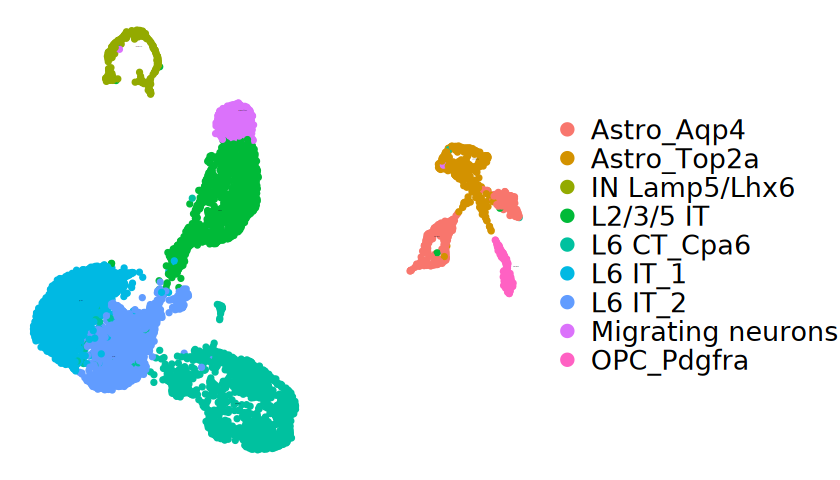

In [18]:
# Create UMAP plot without axes, axis labels, and titles, and with larger legend text
options(repr.plot.width = 7, repr.plot.height = 4)
RNA_umap_plot <- DimPlot(rna.obj.annotated.Seurat.v4, shuffle = TRUE, label = TRUE, repel = TRUE, 
                         pt.size = 1, label.size = 0, reduction = "umap", 
                         group.by = 'celltype240423', raster = FALSE) + 
  theme_void() + # Remove all axes, labels, and titles
  theme(
    plot.title = element_blank(), # Remove plot title
    axis.title = element_blank(), # Remove axis titles
    axis.text = element_blank(),  # Remove axis text
    axis.ticks = element_blank(), # Remove axis ticks
    legend.text = element_text(size = 16) # Increase legend text size
  )

# Display the plot
RNA_umap_plot

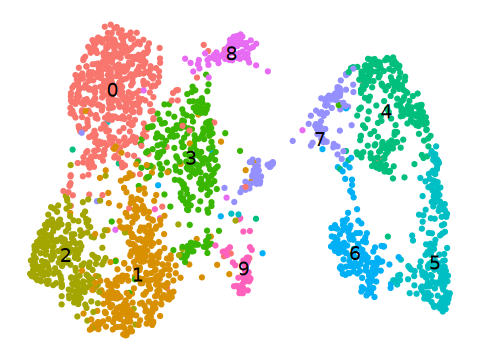

In [19]:
# ATAC
options(repr.plot.width=4, repr.plot.height=3)

ATAC_umap_plot <- DimPlot(object = atac.obj.annotated.Seurat.v4, label = TRUE) + 
  NoLegend() + # Remove the legend
  theme_void() + # Remove all axes, labels, and titles
  theme(
    plot.title = element_blank(), # Remove plot title
    axis.title = element_blank(), # Remove axis titles
    axis.text = element_blank(),  # Remove axis text
    axis.ticks = element_blank()  # Remove axis ticks
  ) + # Remove axes and labels
  theme(legend.position = "none") # Ensure no legend

# Display the plot
ATAC_umap_plot

## STEP 2: Anchor ATAC to RNA

In [20]:
# quantify gene activity
DefaultAssay(atac.obj.annotated.Seurat.v4) <- 'ATAC'
gene.activities <- GeneActivity(atac.obj.annotated.Seurat.v4, features = VariableFeatures(rna.obj.annotated.Seurat.v4))

Extracting gene coordinates

Extracting reads overlapping genomic regions



In [21]:
# add gene activities as a new assay
atac.obj.annotated.Seurat.v4[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)

# normalize gene activities
DefaultAssay(atac.obj.annotated.Seurat.v4) <- "ACTIVITY"
atac.obj.annotated.Seurat.v4 <- NormalizeData(atac.obj.annotated.Seurat.v4)
atac.obj.annotated.Seurat.v4 <- ScaleData(atac.obj.annotated.Seurat.v4, features = rownames(atac.obj.annotated.Seurat.v4))

Centering and scaling data matrix



In [22]:
# Identify anchors
transfer.anchors <- FindTransferAnchors(reference = rna.obj.annotated.Seurat.v4, 
                                        query = atac.obj.annotated.Seurat.v4, 
                                        features = VariableFeatures(object = rna.obj.annotated.Seurat.v4),
                                        reference.assay = "RNA", 
                                        query.assay = "ACTIVITY", 
                                        reduction = "cca")

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8628 anchors



## STEP 3: Annotate snATAC-seq cells via label transfer

In [23]:
table(rna.obj.annotated.Seurat.v4$celltype240423)


       Astro_Aqp4       Astro_Top2a     IN Lamp5/Lhx6         L2/3/5 IT 
              465               336               320              1175 
       L6 CT_Cpa6           L6 IT_1           L6 IT_2 Migrating neurons 
             1628              1476              1245               347 
       OPC_Pdgfra 
              166 

In [24]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, 
                                     refdata = rna.obj.annotated.Seurat.v4$celltype240423,
                                     weight.reduction = atac.obj.annotated.Seurat.v4[["lsi"]], 
                                     dims = 2:30)

atac.obj.annotated.Seurat.v4 <- AddMetaData(atac.obj.annotated.Seurat.v4, metadata = celltype.predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [25]:
Reductions(atac.obj.annotated.Seurat.v4)

[1] "lsi"  "umap"

In [26]:
colnames(atac.obj.annotated.Seurat.v4@meta.data)

[1] "orig.ident"                         "nCount_ATAC"                       
 [3] "nFeature_ATAC"                      "nucleosome_signal"                 
 [5] "nucleosome_percentile"              "TSS.enrichment"                    
 [7] "TSS.percentile"                     "ATAC_snn_res.1.2"                  
 [9] "seurat_clusters"                    "nCount_ACTIVITY"                   
[11] "nFeature_ACTIVITY"                  "predicted.id"                      
[13] "prediction.score.IN.Lamp5.Lhx6"     "prediction.score.L2.3.5.IT"        
[15] "prediction.score.Astro_Aqp4"        "prediction.score.Astro_Top2a"      
[17] "prediction.score.L6.IT_2"           "prediction.score.Migrating.neurons"
[19] "prediction.score.L6.CT_Cpa6"        "prediction.score.OPC_Pdgfra"       
[21] "prediction.score.L6.IT_1"           "prediction.score.max"

## STEP 4: Visualize anchoring result

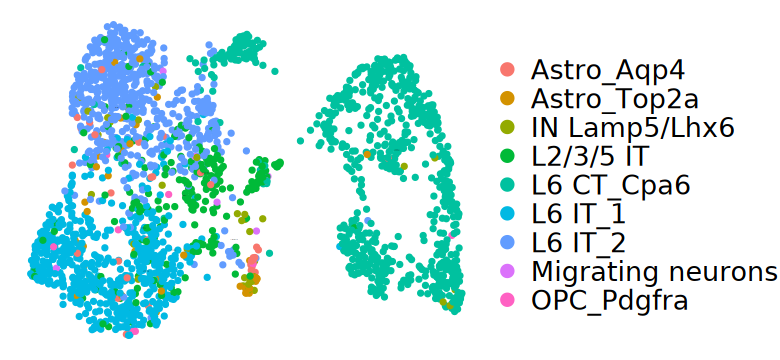

In [27]:
options(repr.plot.width=6.5, repr.plot.height=3)

annotated_ATAC_umap_plot <- DimPlot(atac.obj.annotated.Seurat.v4, 
                          label = TRUE, 
                          repel = TRUE, 
                          pt.size = 1, 
                          label.size = 0, 
                          reduction = "umap", 
                          group.by = 'predicted.id') + 
  theme_void() + # Remove all axes, labels, and titles
  theme(
    plot.title = element_blank(), # Remove plot title
    axis.title = element_blank(), # Remove axis titles
    axis.text = element_blank(),  # Remove axis text
    axis.ticks = element_blank(), # Remove axis ticks
    legend.text = element_text(size = 16) # Increase legend text size
  )

# Display the plot
annotated_ATAC_umap_plot

In [28]:
table(atac.obj.annotated.Seurat.v4$predicted.id)


       Astro_Aqp4       Astro_Top2a     IN Lamp5/Lhx6         L2/3/5 IT 
               37                38                37               222 
       L6 CT_Cpa6           L6 IT_1           L6 IT_2 Migrating neurons 
              765               559               569                 9 
       OPC_Pdgfra 
                9 

## STEP 5: Save PDFs of plots

In [29]:
# Ensure the directory exists
if (!dir.exists(plot_save_dir_annotations)) {
  dir.create(plot_save_dir_annotations, recursive=TRUE)
}

In [30]:
ggsave(file.path(plot_save_dir_annotations, "RNA_umap_plot.pdf"), plot = RNA_umap_plot, device = "pdf", dpi = 300, width = 6, height = 4)
ggsave(file.path(plot_save_dir_annotations, paste0(sample, "_annotated_ATAC_umap_plot.pdf")), plot = annotated_ATAC_umap_plot, device = "pdf", dpi = 300, width = 6, height = 3)


## STEP 6: Save labeled snATAC-seq object 

In [31]:
save_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/3_filtered_anchored_to_ALL_RNA"

In [32]:
saveRDS_path <- paste0(save_dir, '/', sample, ".ATAC.anchored.", all_or_gfp, ".annotated.Seurat.v5.rds")
saveRDS(atac.obj.annotated.Seurat.v4, file = saveRDS_path)

atac.obj.annotated.Seurat.v4
Version(atac.obj.annotated.Seurat.v4)

print('Object saved')

An object of class Seurat 
295698 features across 2245 samples within 2 assays 
Active assay: ACTIVITY (1528 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

[1] '5.0.2'

[1] "Object saved"


# END